<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MachineLearning/5_KNNyArbolesDeDecision/KNN_Arboles.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Modelos no paramétricos: K-Nearest Neighbours y Árboles de decisión

Documentación:
- KNN para clasificación: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
- KNN para regresión: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor
- Árboles para clasificación: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Árboles para regresión: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

## Seteo de librerias

In [7]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification, make_blobs, load_breast_cancer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

# modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

DISPLAY_PRECISION = 4
pd.set_option("display.precision", DISPLAY_PRECISION)

## 1. KNN



### 1.1 Introducción: Fronteras de decisión

Para familirizarnos con este modelo y podervisualizar como quedan las fronteras de decisión empezaremos con un problema de clasificación binaria con dos features con un dataset de juguete que generaremos nosotros con la función [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).

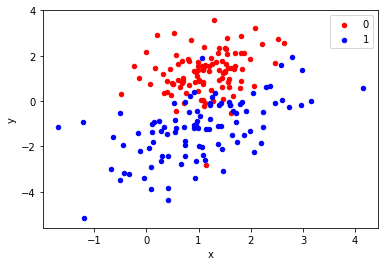

In [8]:
# construyamos el dataset para un problema de clasificación binaria de dos dimensiones
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2,n_clusters_per_class=1,
                           random_state=1, class_sep=1.1)
# scatter plot, colores por etiquetas
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

In [9]:
# instanciemos y entrenemos el modelo
model = KNeighborsClassifier(n_neighbors=10,weights='uniform')
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

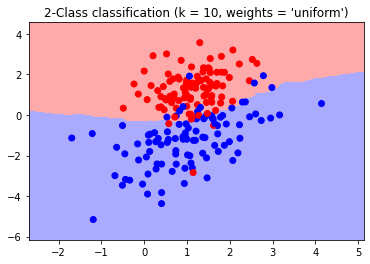

In [10]:
# visualicemos las predicciones

# elegimos algunos colores de la lista de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# tenemos que armar una grilla y setear un step
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# usamos un pcolormesh
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# ploteamos también los puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i, weights = '%s')"
          % (10, 'uniform'))

plt.show()

In [11]:
model = KNeighborsClassifier(n_neighbors=200,weights='uniform')
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=200, p=2,
                     weights='uniform')

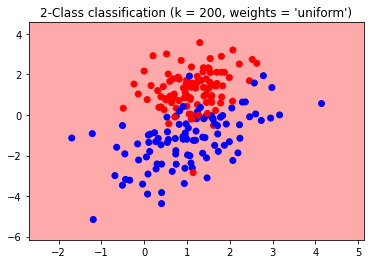

In [12]:
# visualicemos las predicciones

# elegimos algunos colores de la lista de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# tenemos que armar una grilla y setear un step
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# usamos un pcolormesh
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# ploteamos también los puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i, weights = '%s')"
          % (200, 'uniform'))

plt.show()

In [13]:
model = KNeighborsClassifier(n_neighbors=200,weights='distance')
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=200, p=2,
                     weights='distance')

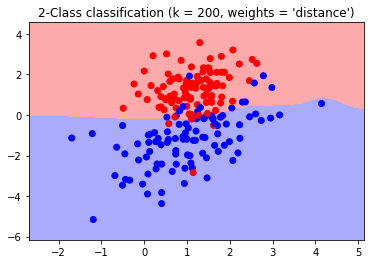

In [14]:
# visualicemos las predicciones

# elegimos algunos colores de la lista de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# tenemos que armar una grilla y setear un step
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# usamos un pcolormesh
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# ploteamos también los puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i, weights = '%s')"
          % (200, 'distance'))

plt.show()

## 1.2 Conjunto de datos de cáncer de mama

El conjunto de datos etiquetado proviene de la "Base de datos (diagnóstico) de cáncer de mama de Wisconsin" disponible gratuitamente en la biblioteca sklearn de python. Para obtener más detalles, consulte:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Número de muestras: 569

Número de funciones: 30 atributos numéricos y predictivos

Número de clases: 2

Las características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen. Se calculan diez características de valor real para cada núcleo celular. La media, el error estándar y el "peor" o el más grande (la media de los tres valores más grandes) de estas características se calcularon para cada imagen, lo que dio como resultado 30 características. Por ejemplo, las medidas del radio son para el "radio medio", el "error estándar del radio" y el "peor radio". Todos los valores de las características se recodifican con cuatro dígitos significativos.

Las dos clases objetivo corresponden a resultados negativos (benignos) y resultados positivos (malignos).

Este conjunto de datos original se dividirá aleatoriamente en dos conjuntos para fines de entrenamiento y prueba.

In [15]:
data = load_breast_cancer()
#print(data.DESCR)

print("Descripción:")
print(data.keys()) # dict_keys(['target_names', 'target', 'feature_names', 'data', 'DESCR'])
print("---")

# Note that we need to reverse the original '0' and '1' mapping in order to end up with this mapping:
# Benign = 0 (negative class)
# Malignant = 1 (positive class)

data_clases = [data.target_names[1], data.target_names[0]]
data_target = [1 if x==0 else 0 for x in list(data.target)]
data_features = list(data.feature_names)

print("Clases Target:")
print("Clases", data_clases)
print("---")
print("Distribución de clases n=%d:" % len(data_target))
print(pd.Series(data_target).value_counts())
print("---")

Descripción:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
---
Clases Target:
Clases ['benign', 'malignant']
---
Distribución de clases n=569:
0    357
1    212
dtype: int64
---


In [16]:
pd.DataFrame(data.data[:,:], columns=data_features).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
# separamos un 25% para test/held-out
X = pd.DataFrame(data.data[:,:], columns=data_features)
y = pd.Series(data_target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 1.3 Overfitting: cantidad de vecinos y pesos

In [18]:
# veamos como le va a nuestro modelo variando la cantidad de vecinos y el tipo de peso
valores_k = list(range(1,50,4))
resultados_train_u = []
resultados_test_u  = []
resultados_train_w = []
resultados_test_w  = []

for k in valores_k:
    # instanciamos el modelo uniforme
    clf_u = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    clf_u.fit(X_train, y_train)
    y_train_pred = clf_u.predict(X_train)
    y_pred = clf_u.predict(X_test)
    resultados_train_u.append(accuracy_score(y_train, y_train_pred))
    resultados_test_u.append(accuracy_score(y_test, y_pred))

    clf_w = KNeighborsClassifier(n_neighbors=k, weights='distance')
    clf_w.fit(X_train, y_train)
    y_train_pred = clf_w.predict(X_train)
    y_pred = clf_w.predict(X_test)
    resultados_train_w.append(accuracy_score(y_train, y_train_pred))
    resultados_test_w.append(accuracy_score(y_test, y_pred))

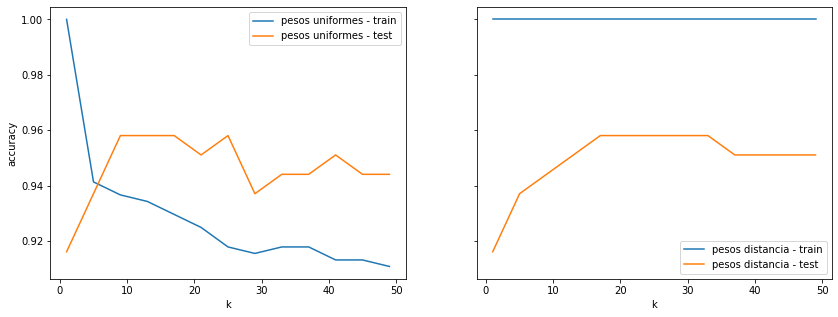

In [19]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,2,figsize=(14,5),sharey=True)
ax[0].plot(valores_k, resultados_train_u, valores_k, resultados_test_u);
ax[0].legend(['pesos uniformes - train', 'pesos uniformes - test']);
ax[0].set(xlabel='k',ylabel='accuracy');

ax[1].plot(valores_k, resultados_train_w, valores_k, resultados_test_w);
ax[1].legend(['pesos distancia - train', 'pesos distancia - test']);
ax[1].set(xlabel='k');

In [20]:
# ahora busquemos nuestro mejor modelo usando validacion cruzada y gridsearchcv pero incluyamos otra distancia!
model = KNeighborsClassifier()
n_neighbors = np.array([1,2,3,5,8,10,15,20,30,50])
param_grid = {'n_neighbors': n_neighbors, 
              'weights':['uniform', 'distance'], 
              'metric':['euclidean', 'chebyshev', 'manhattan']}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)
pd.DataFrame(grid.cv_results_).sample(3)

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.0021,1.0687e-04,0.0027,9.7896e-05,euclidean,30,distance,"{'metric': 'euclidean', 'n_neighbors': 30, 'we...",0.9651,0.8941,0.8941,0.9294,0.9176,0.9201,0.0263,40
30,0.0021,2.2685e-04,0.0047,8.0798e-04,chebyshev,10,uniform,"{'metric': 'chebyshev', 'n_neighbors': 10, 'we...",0.9651,0.8941,0.9059,0.9059,0.9412,0.9224,0.0265,36
45,0.0020,9.3792e-05,0.0022,1.1450e-04,manhattan,3,distance,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.9767,0.8824,0.9294,0.9412,0.9529,0.9365,0.0313,8


In [21]:
# evaluemos este clasificador usando el classification report
print(classification_report(y_test, grid.best_estimator_.predict(X_test), target_names=data_clases))

              precision    recall  f1-score   support

      benign       0.96      0.98      0.97        90
   malignant       0.96      0.92      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



## 1.4 Efectos de escala

Dado que KNN esta basado en distancias si no usamos una distancia que involucra la varianza entre variables como la distancia de Mahalabois, nuestro modelo se verá afectado

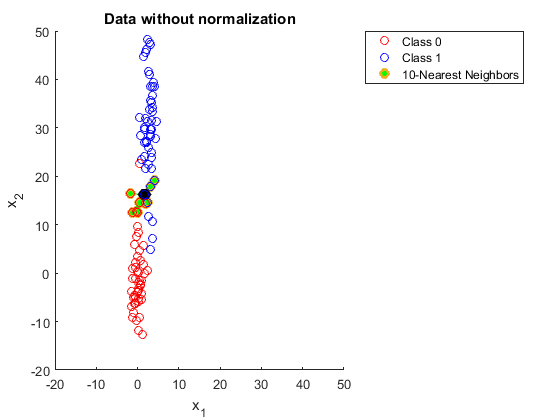

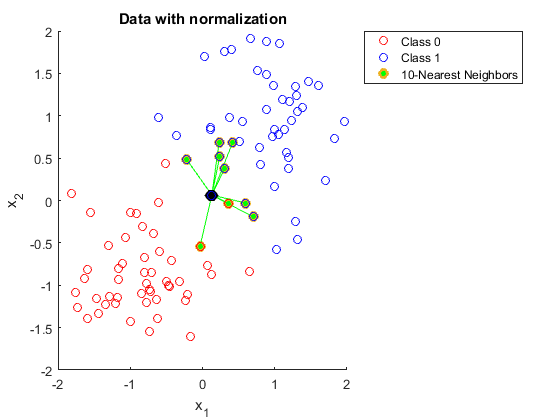

https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn

In [22]:
XX,yy = make_classification(n_samples=400,n_features=2,n_classes=2,
                          n_redundant=0,n_informative=2,
                          n_clusters_per_class=2,random_state=48)

XX[:,0] = XX[:,0]*30 + 150

print('Media x: {}'.format(np.mean(XX[:,0])))
print('SD x: {}'.format(np.std(XX[:,0])))

print('Media y: {}'.format(np.mean(XX[:,1])))
print('SD y: {}'.format(np.std(XX[:,1])))

Media x: 150.4912351511699
SD x: 39.90933364722069
Media y: 0.011031649918614495
SD y: 1.2066153568418274


In [23]:
kf = KFold(n_splits=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(XX, yy)
print(cross_val_score(knn, XX, yy, cv=kf).mean())

0.885


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XX_scaled = scaler.fit_transform(XX)
print('Media x: {}'.format(np.mean(XX_scaled[:,0])))
print('SD x: {}'.format(np.std(XX_scaled[:,0])))

print('Media y: {}'.format(np.mean(XX_scaled[:,1])))
print('SD y: {}'.format(np.std(XX_scaled[:,1])))

Media x: 1.4210854715202004e-16
SD x: 1.0000000000000004
Media y: -1.1102230246251566e-17
SD y: 0.9999999999999997


In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(XX, yy)
print(cross_val_score(knn, XX_scaled, yy, cv=kf).mean())

0.9675


***
## 2. Árboles de decisión

Continuaremos trabajando con el dataset de cancer de mama para familiarizarnos con los árboles de decisión

## 2.1 Mi primer arbolito

In [49]:
# instanciemos el modelo y entremoslo en el conjunto de autos
arbol = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0)
arbol.fit(X_train,y_train)
accuracy_score(y_train, arbol.predict(X_train))

0.9413145539906104

In [50]:
# veamos que tan bien le fue a este modelo
print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        90
           1       0.90      0.89      0.90        53

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



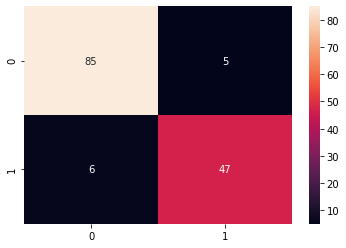

In [51]:
# visualicemos los errores de este árbol en una matriz de confusión
cf_matrix = confusion_matrix(y_test, arbol.predict(X_test))
sns.heatmap(cf_matrix, annot=True);

## 2.2 Feature importance

Los árboles nos permiten definir una manera de medir la importancia de los features (o *Feature Importances*) basado en la ganancia de información obtenida cada vez que se utilizo cada feature para hacer un split. Para esto, una vez entrando el árbol, el método que utilizaremos es: 

```
# arbol.feature_importances_
```



In [52]:
# calculando las 5 feature importances mas altas
importances = pd.Series(arbol.feature_importances_).sort_values(ascending=False)[:5]
importances

7     0.8602
23    0.0899
20    0.0499
29    0.0000
13    0.0000
dtype: float64

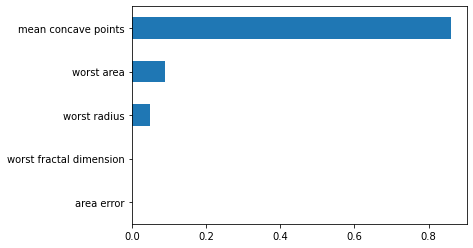

In [53]:
f5_names = list(pd.Series(data.feature_names)[importances.index.to_list()])
fig, ax = plt.subplots()
importances.plot.barh(ax=ax)
ax.set_yticklabels(f5_names)
ax.invert_yaxis()

## 2.3 Desbalance de clases
Como este dataset tiene un desbalance de clases, podes incluir eso en el modelo utilizando el parámetro class_weight que nos permite manejar directamente el desbalance


In [54]:
arbol = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=1,
                               min_samples_split=2, ccp_alpha=0, class_weight="balanced")
arbol.fit(X_train, y_train)
accuracy_score(y_train, arbol.predict(X_train))

0.9460093896713615

In [55]:
print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        90
           1       0.85      1.00      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.95      0.94      0.94       143



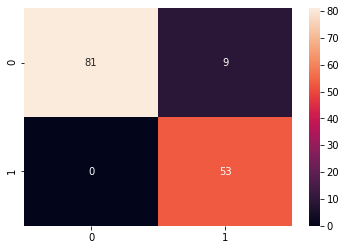

In [33]:
cf_matrix = confusion_matrix(y_test, arbol.predict(X_test))
sns.heatmap(cf_matrix, annot=True);

## 2.4 Visualización

Para visualizar el árbol sklearn tiene el método tree.plot_tree:

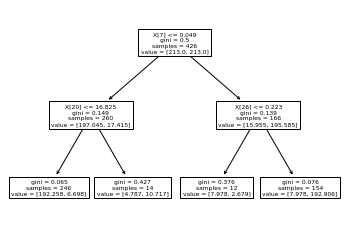

In [34]:
plot_tree(arbol);

Podemos obtener una representación mas estilizada con la ayuda de las librerías *graphviz* + *dot*. Ref: https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


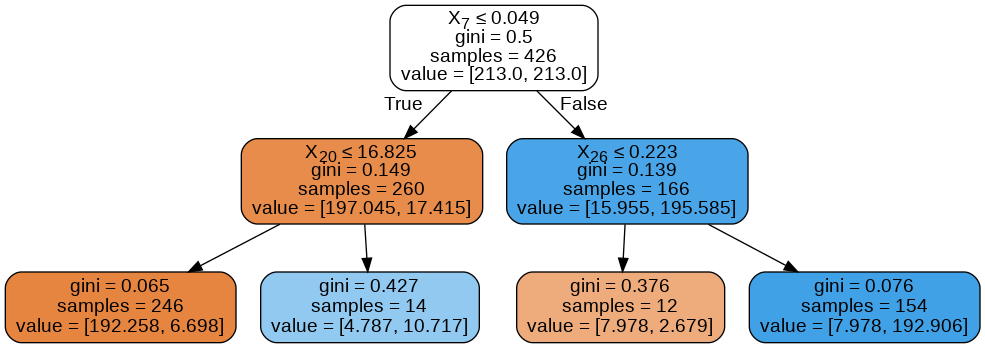

In [35]:
# libreria
from sklearn.externals.six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 2.5 Overfitting: profundidad del árbol y post-pruning

Dado que los árboles son modelos que tienden a overfittear tenemos que recurrir a distintas técnicas para mitigar este problema. Veamos primero el efecto de la profundidad del árbol en el trade-off sesgo varianza.

In [36]:
profundidad = list(range(1,20))
resultados_train = []
resultados_test  = []

for depth in profundidad:
    # instanciamos el modelo uniforme
    arbol = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0, class_weight="balanced")
    arbol.fit(X_train, y_train)
    y_train_pred = arbol.predict(X_train)
    y_pred = arbol.predict(X_test)
    resultados_train.append(accuracy_score(y_train, y_train_pred))
    resultados_test.append(accuracy_score(y_test, y_pred))

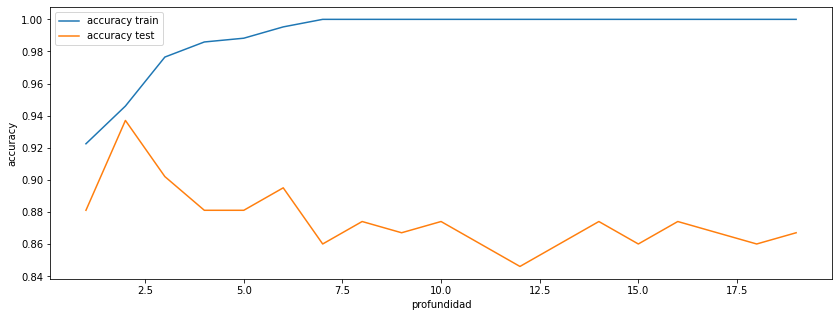

In [37]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,1,figsize=(14,5),sharey=True)
ax.plot(profundidad, resultados_train, profundidad, resultados_test);
ax.legend(['accuracy train', 'accuracy test']);
ax.set(xlabel='profundidad',ylabel='accuracy');

In [38]:
# veamos que pasa con un árbol sin corte de profundidad
np.random.seed(2021)
arbol = DecisionTreeClassifier(criterion='gini', ccp_alpha=0)
arbol.fit(X_train, y_train)
#print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))
print('Accuracy en entrenamiento: %f' % accuracy_score(y_train,arbol.predict(X_train)))
print('Accuracy en test: %f' % accuracy_score(y_test,arbol.predict(X_test)))

Accuracy en entrenamiento: 1.000000
Accuracy en test: 0.909091


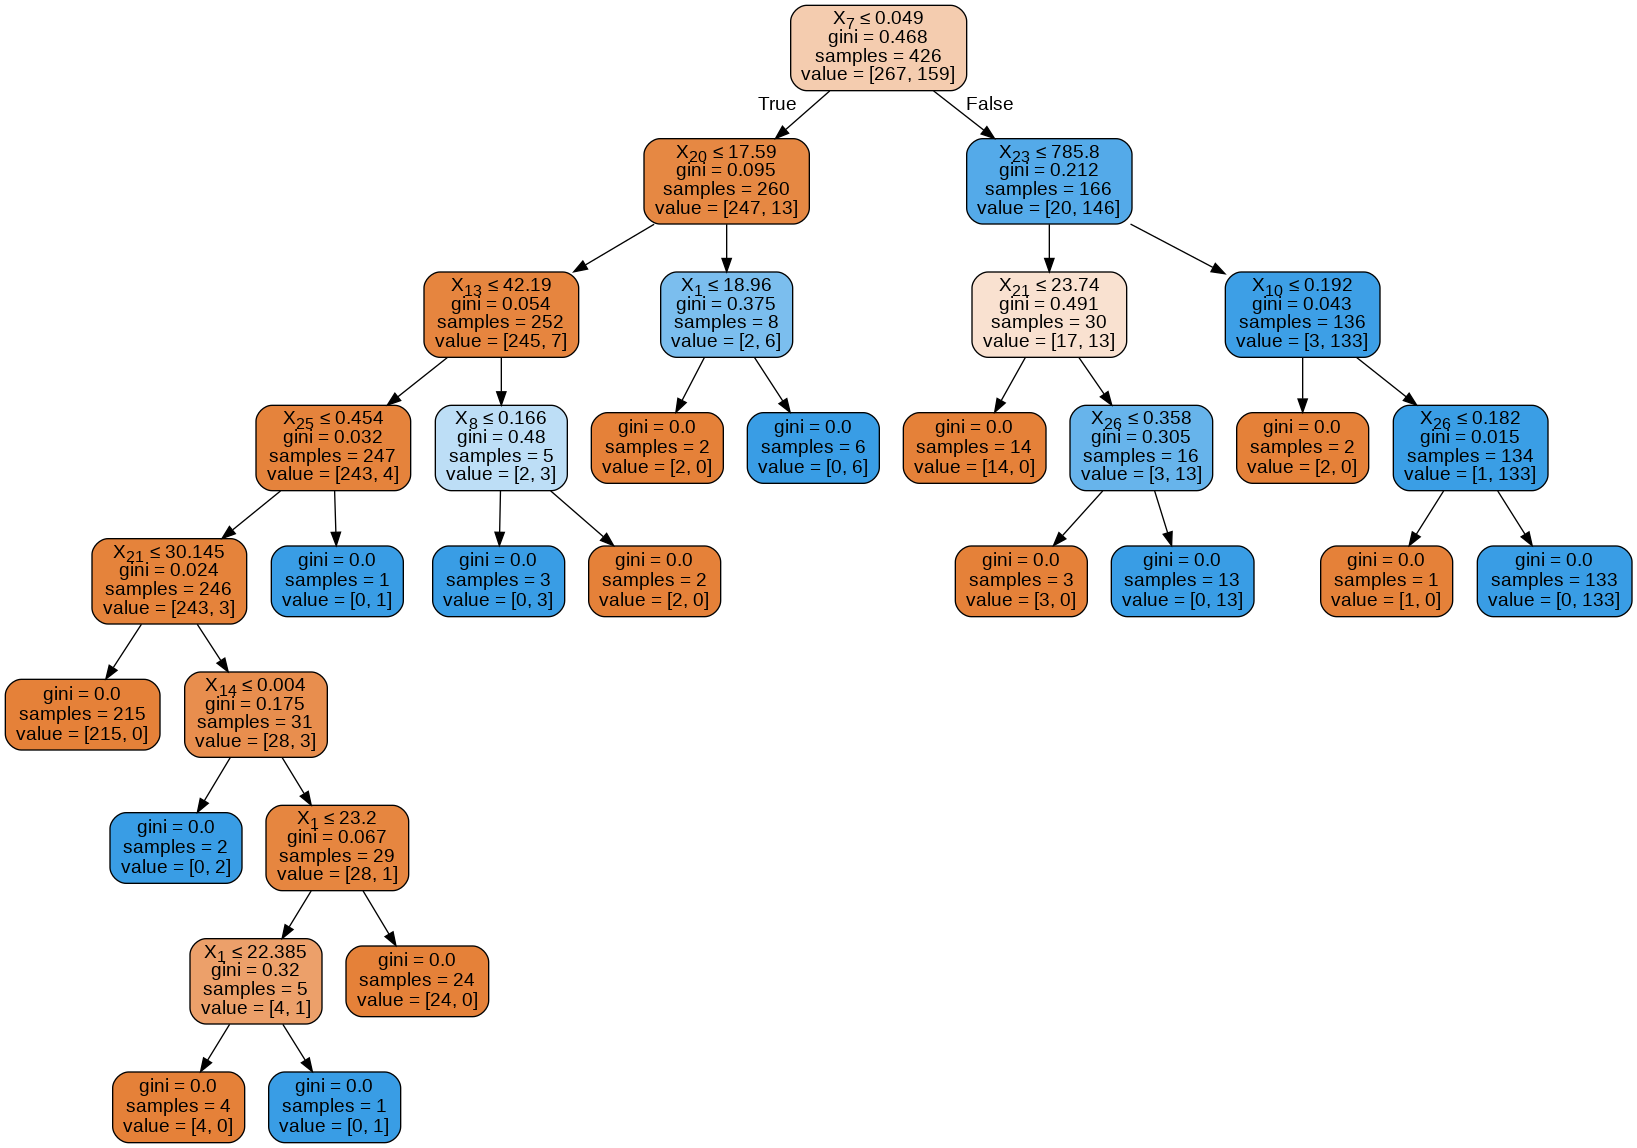

In [39]:
# grafiquemos este árbol
dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Una técnica que nos permite mitigar el overfitting es lo que se conoce como post-prunning. El objetivo de esta técnica es *podar* el árbol entrenado, penalizando de alguna forma los árboles más complejos. El algortimo de poda que tenemos implementado en Scikit-Learn es el [Minimal Cost-Complexity Pruning](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning). El hiperparámetro que controla esta penalización es ccp_alpha$\geq 0$, cuando este hiperparámetro es 0, no realizamos ningún tipo de poda, y a medida que aumentamos dicho hiperparámetro penalizaremos más fuertemente la cantidad de nodos terminales del árbol.

In [40]:
arbol = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.01)
arbol.fit(X_train, y_train)
#print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))
print('Accuracy en entrenamiento: %f' % accuracy_score(y_train,arbol.predict(X_train)))
print('Accuracy en test: %f' % accuracy_score(y_test,arbol.predict(X_test)))

Accuracy en entrenamiento: 0.971831
Accuracy en test: 0.916084


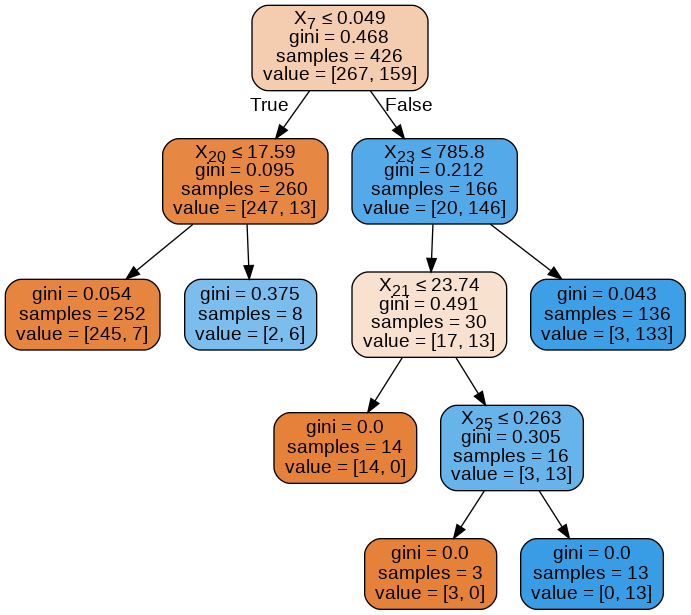

In [41]:
dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [42]:
# veamos como afecta el rendimiento y la profundidad del árbol
ccp_alpha_vals = np.arange(0,1,0.05)
resultados_train = []
resultados_test  = []
profundidad      = []

for ccp in ccp_alpha_vals:
    # instanciamos el modelo uniforme
    arbol = DecisionTreeClassifier(criterion='gini', ccp_alpha=ccp)
    arbol.fit(X_train, y_train)
    # guardamos la profundidad del árbol
    profundidad.append(arbol.tree_.max_depth)
    y_train_pred = arbol.predict(X_train)
    y_pred = arbol.predict(X_test)
    resultados_train.append(accuracy_score(y_train, y_train_pred))
    resultados_test.append(accuracy_score(y_test, y_pred))

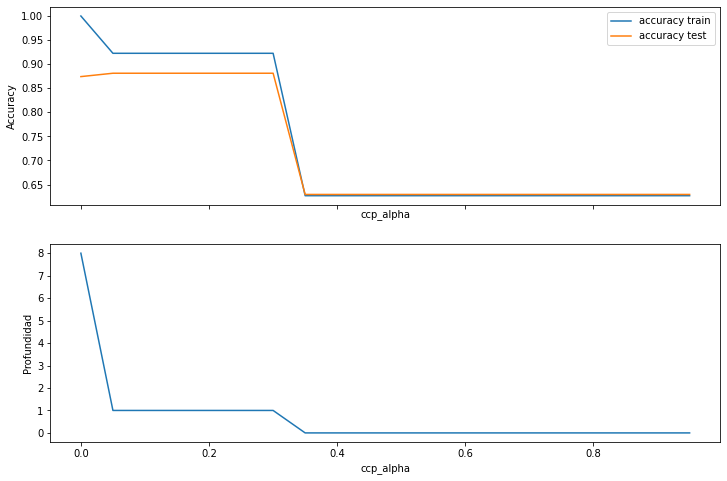

In [43]:
f,ax = plt.subplots(2,1,figsize=(12,8),sharex=True)
ax[0].plot(ccp_alpha_vals, resultados_train, ccp_alpha_vals, resultados_test);
ax[0].legend(['accuracy train', 'accuracy test']);
ax[0].set(xlabel='ccp_alpha',ylabel='Accuracy');
ax[1].plot(ccp_alpha_vals, profundidad)
ax[1].set(xlabel='ccp_alpha',ylabel='Profundidad');